# Signal region MC contributions

Kak W., 2018-10-29


 - Double check signal region counts
 - assume integrated luminosity of 35.9 $fb^{-1}$
 

### Sample Pre-selection
- METFilter applied
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in events (2nd lepton veto)
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - only one barrel photon $p_{T}$ > 50
 - inverse Z mass cut (center = 91GeV, width = 15)
 - photon passing electron veto (Pixel Seed)
 - $p^{miss}_{T}$ > 25GeV
 

⭕️ __PU and NLO weights applied __

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 
- WGamma
  - WGToLNuG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8PhCutMax/
  - WGToLNuG_PtG-130_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8PhCutMaxPhCutMin/
  - WGToLNuG_PtG-500_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8PhCutMin/
- WJets
   - WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8TrueHTOlapPhOlap/
   - WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-600To800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-800To1200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-1200To2500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
   - WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
- GJets
   - GJets_HT-40To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/
   - GJets_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/
   - GJets_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/
   - GJets_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/
   - GJets_HT-600ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/
- DiPhotonJets_MGG-80toInf_13TeV_amcatnloFXFX_pythia8/
- TTJets
  - TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
  - TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/
  - TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8PhOlap/


## Import Samples

In [5]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [6]:
# old sample without MET filter /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/ 
%run interactiveStackTree.py --baseDir  /data/users/fengyb/WGammaNtuple/LepGamma_elg_2018_08_19 \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet


-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103817  lumi : 1.51e+04 scale :

In [7]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0'
base1eta = base1 + ' && ph_IsEB[0]'
passpix = '&& ph_hasPixSeed[0]==0'  #Pixel seed
failpix = '&& ph_hasPixSeed[0]==1'
passcsev = '&& ph_passEleVeto[0]==1' #CSEV
failcsev = '&& ph_passEleVeto[0]==0' 
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
invZ = '&& abs(m_lep_ph-91)>15'

In [8]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
#samples.change_stack_order("GammaGamma","Wjets")
err = array('d',[0])

## Fill histogram

## Pixel Veto

mt_lep_met_ph : PUWeight*NLOWeight*(ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&&met_pt>25&& abs(m_lep_ph-91)>15&& ph_hasPixSeed[0]==0&&ph_pt[0]>50)
stack_sum 30762.6035345


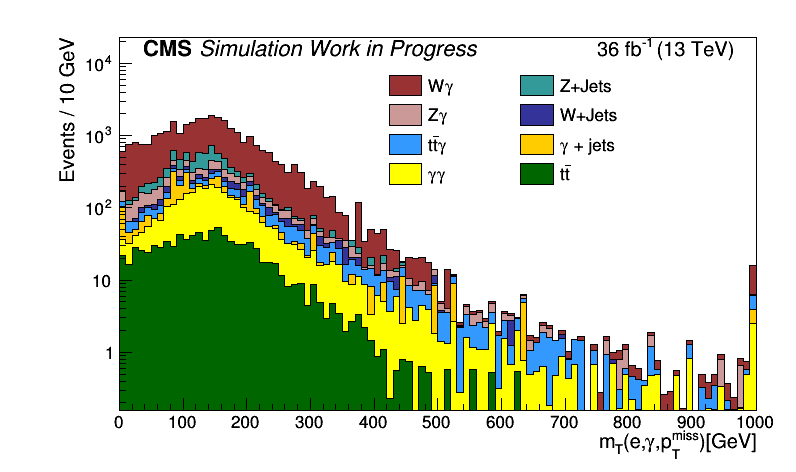

Info in <TCanvas::Print>: png file /tmp/tmp_H54Ao.png has been created


In [9]:
selection = "PUWeight*NLOWeight*("+ base1eta + gtmet + invZ + passpix + phpt50+")"
samples.Draw("mt_lep_met_ph", selection, (100,0,1000),
             {"xlabel":"m_{T}(e,#gamma,p^{miss}_{T})","logy":1,'ymax':1e4,"blind":True},
             {'legendLoc':"Double","legendTranslateX":0.3});
samples.curr_canvases["top"]

### Event count by sample (pixel Veto)
 - Yongbin's number
   - Wgamma: 2.13e+4
   - Z+jets: 2.18e+3 
   - GammaGamma: 6.37e+3 (incorr. xsec, should be ~ 2.15e+3)
   - Zgamma: 1.64+03

In [10]:
samples.print_stack_count()

         Wgamma 2.12e+04 +/-   586
         Z+jets 2.17e+03 +/-  97.1
     GammaGamma 2.15e+03 +/-  25.6
         Zgamma 1.64e+03 +/-  36.8
          GJets 1.06e+03 +/-   245
            TTG      990 +/-  17.1
         AllTop      879 +/-  20.7
          Wjets      662 +/-  52.5
          TOTAL 3.08e+04 +/-   646


In [15]:
samples.change_stack_order("Wgamma","Zgamma")

In [13]:
%jsroot

In [16]:
samples.Draw("m_lep_ph", base1eta + ltmet + passpix + phpt50 , (150,0,300),
             {"xlabel":"m_{T}(e,#gamma)","logy":1,'ymax':1e4,"blind":True, "weight":"PUWeight*NLOWeight"},
             {'legendLoc':"Double","legendTranslateX":0.3});
samples.curr_canvases["top"].Draw()

m_lep_ph : ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&&met_pt<25&& ph_hasPixSeed[0]==0&&ph_pt[0]>50
stack_sum 25772.5049748


In [17]:
samples.print_stack_count()

         Z+jets 1.24e+04 +/-   235
         Wgamma 6.59e+03 +/-   327
     GammaGamma 2.34e+03 +/-  26.5
         Zgamma  2.1e+03 +/-  41.4
          GJets 1.95e+03 +/-   441
          Wjets      166 +/-  27.1
            TTG      138 +/-  6.41
         AllTop      121 +/-  7.55
          TOTAL 2.58e+04 +/-   600


## Conclusion

 
Full documentation: http://hepcms-hn.umd.edu/~kakw/2018_10_29_control_reg_echannel.html

#   

#   

#   

#   

# BACKUP

#   


met_pt : PUWeight*NLOWeight*(ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&& abs(m_lep_ph-91)>15&& ph_hasPixSeed[0]==0&&ph_pt[0]>50)
stack_sum 43871.6556113
True
Draw Signal hist  MadGraphResonanceMass300_width0p01
True
Draw Signal hist  MadGraphResonanceMass450_width5
True
Draw Signal hist  MadGraphResonanceMass800_width0p01


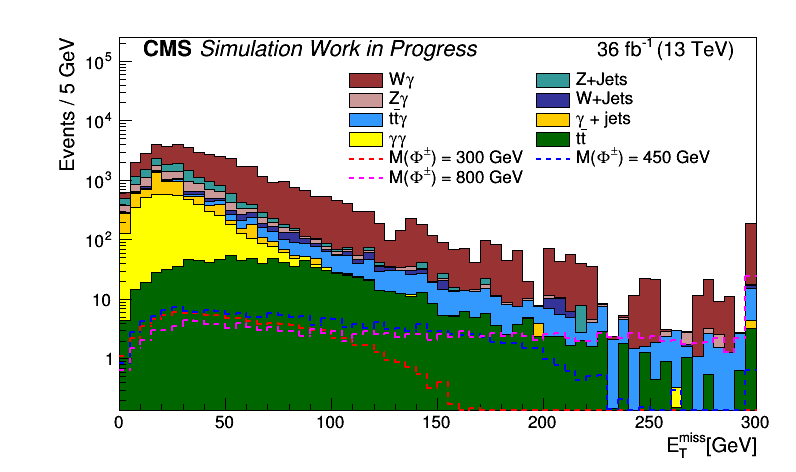

Info in <TCanvas::Print>: png file /tmp/tmpuqgq8s.png has been created


In [9]:
selection = "PUWeight*NLOWeight*("+ base1eta  + invZ + passpix + phpt50+")"
samples.Draw("met_pt", selection, (60,0,300),
             {"xlabel":"E^{miss}_{T}","logy":1,"ymax":1e5,"blind":True},
             {"legendLoc":"Double",'legendTranslateX':0.25});
samples.curr_canvases["top"]

m_lep_ph : PUWeight*NLOWeight*(ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&& ph_hasPixSeed[0]==0&&ph_pt[0]>50)
stack_sum 73648.3757711
True
Draw Signal hist  MadGraphResonanceMass300_width0p01
True
Draw Signal hist  MadGraphResonanceMass450_width5
True
Draw Signal hist  MadGraphResonanceMass800_width0p01


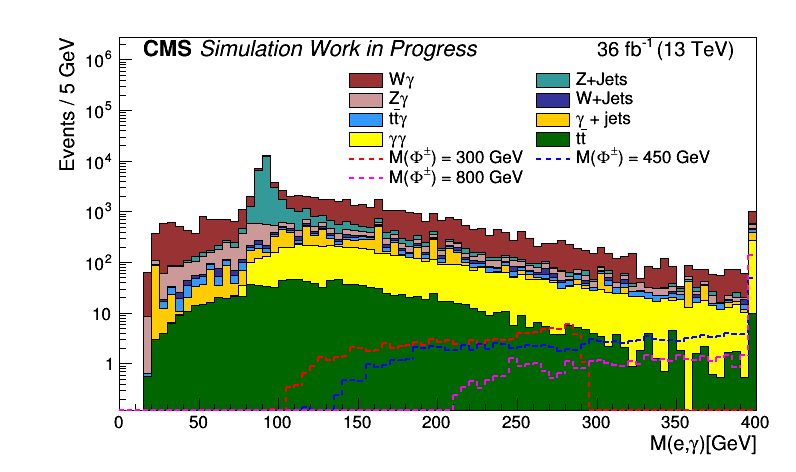

Info in <TCanvas::Print>: png file /tmp/tmpOZm_sf.png has been created


In [10]:
selection = "PUWeight*NLOWeight*("+ base1eta  + passpix + phpt50+")"
samples.Draw("m_lep_ph", selection, (80,0,400),
             {"xlabel":"M(e,#gamma)","logy":1,"ymax":1e6,"blind":True},
             {"legendLoc":"Double",'legendTranslateX':0.25});
samples.curr_canvases["top"]

## Pixel Veto (WITHOUT weights)

In [11]:
samples.Draw("mt_lep_met_ph","("+ base1eta + gtmet + invZ + passpix + phpt50+")",
             (70,0,3500),{"xlabel":"m_{T}(e,#gamma,p^{miss}_{T})","ymin":1e-2,"logy":1,"blind":True});

mt_lep_met_ph : (ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&&met_pt>25&& abs(m_lep_ph-91)>15&& ph_hasPixSeed[0]==0&&ph_pt[0]>50)
stack_sum 50974.6809024
True
Draw Signal hist  MadGraphResonanceMass300_width0p01
True
Draw Signal hist  MadGraphResonanceMass450_width5
True
Draw Signal hist  MadGraphResonanceMass800_width0p01


### Tranverse Mass

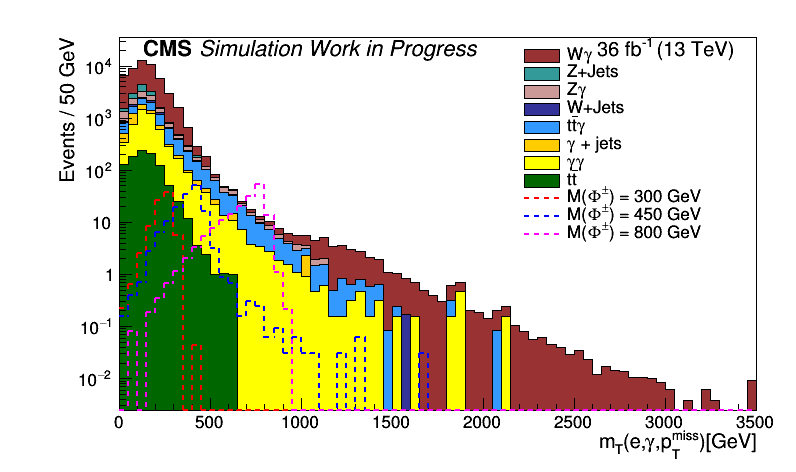

Info in <TCanvas::Print>: png file /tmp/tmpKnJLwX.png has been created


In [12]:
samples.curr_canvases["top"]

### Event count by sample (pixel Veto)

In [13]:
samples.print_stack_count()

         Wgamma 3.51e+04 +/-   565
     GammaGamma 4.11e+03 +/-  25.3
            TTG 3.24e+03 +/-  16.5
         Zgamma  2.9e+03 +/-  36.3
         Z+jets 2.53e+03 +/-   103
          GJets 1.42e+03 +/-   334
         AllTop      973 +/-  21.4
          Wjets      695 +/-  52.3
MadGraphResonanceMass800_width0p01      165 +/-   2.1
MadGraphResonanceMass450_width5      146 +/-  2.12
MadGraphResonanceMass300_width0p01     80.8 +/-  1.34
          TOTAL  5.1e+04 +/-   669


## Conversion Safe eVeto (WITHOUT weights)

### Tranverse Mass

mt_lep_met_ph : (ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&&met_pt>25&& abs(m_lep_ph-91)>15&& ph_passEleVeto[0]==1&&ph_pt[0]>50)
stack_sum 59048.9188016
True
Draw Signal hist  MadGraphResonanceMass300_width0p01
True
Draw Signal hist  MadGraphResonanceMass450_width5
True
Draw Signal hist  MadGraphResonanceMass800_width0p01


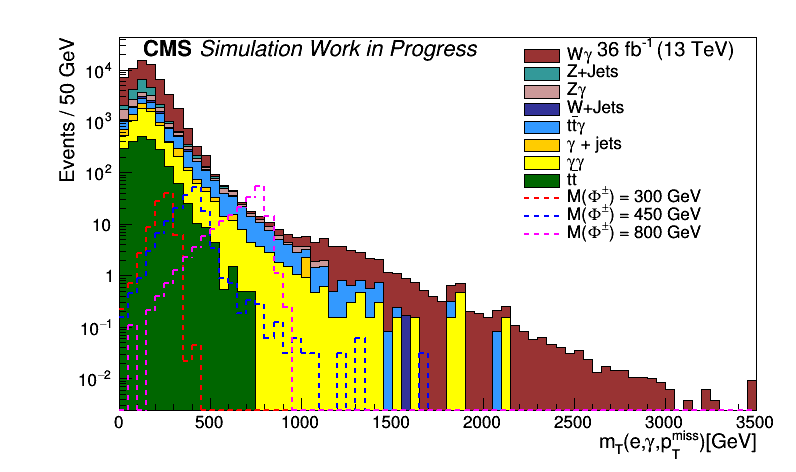

Info in <TCanvas::Print>: png file /tmp/tmp0a2_Uh.png has been created


In [14]:
histp = {"xlabel":"m_{T}(e,#gamma,p^{miss}_{T})","ymin":1e-2,"logy":1,"blind":True}
select = "("+ base1eta + gtmet + invZ + passcsev + phpt50 +")"
samples.Draw("mt_lep_met_ph",select,(70,0,3500),histp);
samples.curr_canvases["top"]

### Event count by sample (conversion safe eVeto)

In [15]:
samples.print_stack_count()

         Wgamma 3.72e+04 +/-   582
         Z+jets 6.33e+03 +/-   163
     GammaGamma 4.45e+03 +/-  26.3
            TTG 3.45e+03 +/-    17
         Zgamma 3.17e+03 +/-  37.9
         AllTop 2.21e+03 +/-  32.8
          GJets 1.38e+03 +/-   298
          Wjets      861 +/-  58.2
MadGraphResonanceMass800_width0p01      174 +/-  2.16
MadGraphResonanceMass450_width5      156 +/-  2.19
MadGraphResonanceMass300_width0p01     85.6 +/-  1.37
          TOTAL  5.9e+04 +/-   679


## Conversion Safe eVeto

mt_lep_met_ph : PUWeight*NLOWeight*(ph_n==1 && el_n==1 && el_pt30_n==1 && mu_n==0 && ph_IsEB[0]&&met_pt>25&& abs(m_lep_ph-91)>15&& ph_passEleVeto[0]==1&&ph_pt[0]>50)
stack_sum 37363.9479397
True
Draw Signal hist  MadGraphResonanceMass300_width0p01
True
Draw Signal hist  MadGraphResonanceMass450_width5
True
Draw Signal hist  MadGraphResonanceMass800_width0p01


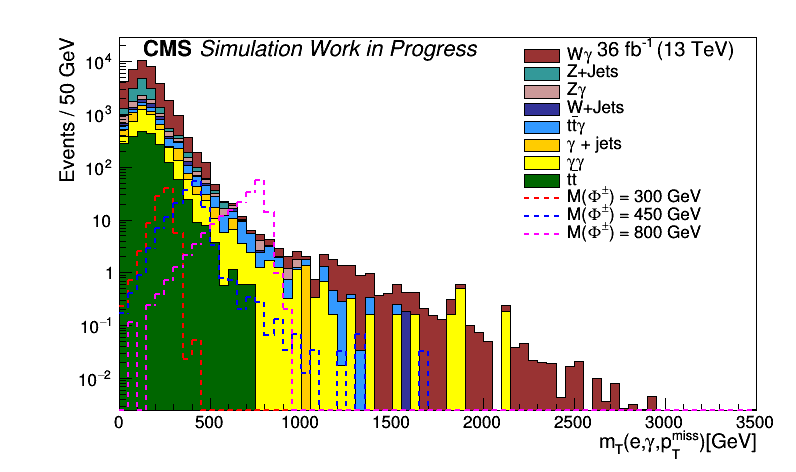

Info in <TCanvas::Print>: png file /tmp/tmpn33Uaz.png has been created


In [7]:
selection = "PUWeight*NLOWeight*("+  base1eta + gtmet + invZ + passcsev + phpt50 +")"
samples.Draw("mt_lep_met_ph", selection,(70,0,3500),
             {"xlabel":"m_{T}(e,#gamma,p^{miss}_{T})","ymin":1e-2,"logy":1,"blind":True});
samples.curr_canvases["top"]

### Event count by sample (conversion safe eVeto)

In [8]:
samples.print_stack_count()

         Wgamma 2.25e+04 +/-   602
         Z+jets 5.68e+03 +/-   158
     GammaGamma 2.32e+03 +/-  26.6
         AllTop 2.06e+03 +/-  32.5
         Zgamma 1.78e+03 +/-  38.3
          GJets 1.17e+03 +/-   255
            TTG 1.05e+03 +/-  17.6
          Wjets      823 +/-  58.6
MadGraphResonanceMass800_width0p01      174 +/-  2.24
MadGraphResonanceMass450_width5      156 +/-  2.27
MadGraphResonanceMass300_width0p01     85.1 +/-  1.42
          TOTAL 3.74e+04 +/-   678


# Save File

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html {nb_name}

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook 2018_10_29_signal_region_echannel.ipynb to slides
[NbConvertApp] Writing 473093 bytes to 2018_10_29_signal_region_echannel.slides.html
[NbConvertApp] Converting notebook 2018_10_29_signal_region_echannel.ipynb to html
[NbConvertApp] Writing 472112 bytes to 2018_10_29_signal_region_echannel.html
Mon Oct 29 15:11:26 EDT 2018
